Importing Modules

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data from csv file

In [312]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [313]:
df.shape

(8371, 17)

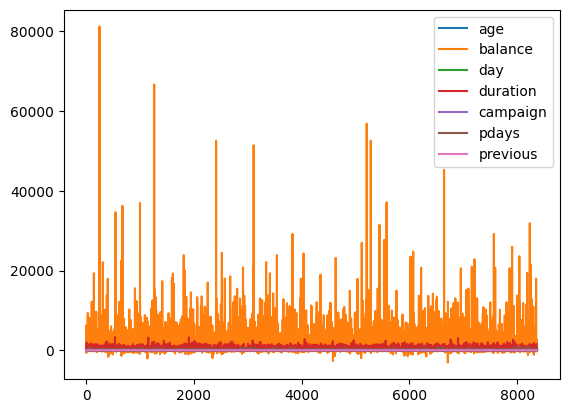

In [314]:
df.plot()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'technician'),
  Text(1, 0, 'housemaid'),
  Text(2, 0, 'management'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'services'),
  Text(5, 0, 'admin.'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'student'),
  Text(8, 0, 'entrepreneur'),
  Text(9, 0, 'retired'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'unknown')])

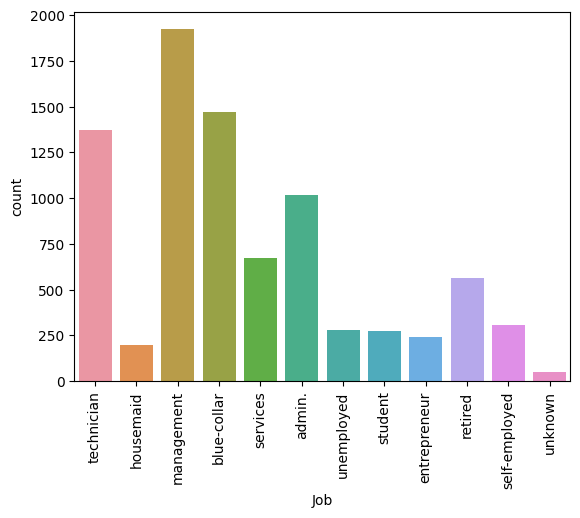

In [315]:
sns.countplot(x="job",data=df)
plt.xlabel("Job")
plt.xticks(rotation = 90) 

Making changes in selected features 

    Changing String to 1 and 0 on their value based

In [316]:
df["deposit"]=df["deposit"].replace('yes',1)
df["deposit"]=df["deposit"].replace('no',0)
df["default"]=df["default"].replace('yes',1)
df["default"]=df["default"].replace('no',0)
df["loan"]=df["loan"].replace('yes',1)
df["loan"]=df["loan"].replace('no',0)
df["housing"]=df["housing"].replace('yes',1)
df["housing"]=df["housing"].replace('no',0)

Locating features in the variable arrays

In [317]:
x=df.iloc[:,[0,4,5,6,7,11,12,13,14]].values
y=df.iloc[:,16].values

Importing Machine Learning Algorithm and Intializing it

In [318]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

C:\Users\shiva\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Reading the Test data and matching feature values

In [319]:
df1 = pd.read_csv(r"C:\Users\shiva\Downloads\test_data.csv")

In [320]:
df["default"]=df["default"].replace('yes',1)
df["default"]=df["default"].replace('no',0)
df1["loan"]=df1["loan"].replace('yes',1)
df1["loan"]=df1["loan"].replace('no',0)
df1["housing"]=df1["housing"].replace('yes',1)
df1["housing"]=df1["housing"].replace('no',0)

Assigning features to testing array and initializing ans array

In [321]:
x_test=df.iloc[:,[0,4,5,6,7,11,12,13,14]].values

In [322]:
y_pred=lr.predict(x_test)
ans=pd.DataFrame(y_pred)
ans=ans.replace(0,'no')
ans=ans.replace(1,'yes')
ans.to_csv("C:\\Users\\shiva\\Downloads\\predict_result.csv")

Importing some other features like confussion matrics, decision tree,  random forest
    
    taking predictions for test data

In [323]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [324]:
cm

array([[3603,  825],
       [1062, 2881]], dtype=int64)

Checking Accuracy, Precision, Recall, and F1 score

In [325]:
accuracy=((3603+2881)/(3603+825+1062+2881))*100
accuracy

77.4578903356827

In [326]:
precision=3603/(3603+825)
precision

0.8136856368563685

In [327]:
recall=3603/(3603+1062)
recall

0.772347266881029

In [328]:
F1_score=2*(precision*recall)/(precision+recall)
F1_score

0.7924777301220719

Checking accuracy using Decision Tree

In [329]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x, y)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_pred)*100))

Decision Tree Test Accuracy 77.46%


Checking accuracy using RandomForest

In [330]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x, y)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_pred)*100))

Random Forest Algorithm Accuracy Score : 77.46%
